<a href="https://colab.research.google.com/github/0-0Jay/Machine-Learning/blob/main/%EC%9E%8E_%EB%B6%84%EB%A5%98_%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

참고 자료<br>
1. 데이터 라벨링 : https://data-panic.tistory.com/13 <br>
2. 이미지 전처리 : https://luvris2.tistory.com/173 <br>

<h1>데이터 전처리</h1>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
from PIL import Image
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
import os
from keras.preprocessing import image

In [13]:
# 데이터 경로 설정
data_dir = '/content/drive/MyDrive/leaf'

# 이미지 데이터 생성기 설정
image_generator = image.ImageDataGenerator(
    rescale=1./255,  # 이미지 값을 0과 1 사이로 정규화
    validation_split=0.2  # 검증용 데이터셋의 비율
)

# 훈련 데이터 생성
train_set = image_generator.flow_from_directory(
    data_dir,
    target_size = (80, 120),  # 이미지 크기 조정
    batch_size = 32,
    class_mode = 'categorical',  # 다중 클래스 분류
    subset = 'training',  # 훈련용 데이터
    shuffle = True
)


# 검증 데이터 생성
validation_set = image_generator.flow_from_directory(
    data_dir,
    target_size = (80, 120),
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'validation',  # 검증용 데이터
    shuffle = True
)



Found 586 images belonging to 5 classes.
Found 144 images belonging to 5 classes.


<h1>이미지 훈련 모델 생성</h1>

In [8]:
train_set.samples /32  # 1에폭당 몇개의 batch가 들어가는지 체크

18.3125

In [9]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(80, 120, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(5, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 78, 118, 32)       896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 39, 59, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 37, 57, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 18, 28, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 26, 64)        36928     
                                                                 
 flatten_1 (Flatten)         (None, 26624)            

In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')
model.fit(train_set,
          steps_per_epoch = 16,   # 훈련세트 수 / 배치 사이즈
          epochs = 7,
          validation_data = validation_set,
          validation_steps = 16)

Epoch 1/7
16/16 [==============================] - ETA: 0s - loss: 1.2229 - accuracy: 0.5163

16/16 [==============================] - 197s 12s/step - loss: 1.2229 - accuracy: 0.5163 - val_loss: 1.0269 - val_accuracy: 0.6319
Epoch 2/7
16/16 [==============================] - 68s 4s/step - loss: 0.6648 - accuracy: 0.7347
Epoch 3/7
16/16 [==============================] - 74s 5s/step - loss: 0.3544 - accuracy: 0.8776
Epoch 4/7
16/16 [==============================] - 69s 5s/step - loss: 0.2043 - accuracy: 0.9327
Epoch 5/7
16/16 [==============================] - 65s 4s/step - loss: 0.1888 - accuracy: 0.9408
Epoch 6/7
16/16 [==============================] - 74s 5s/step - loss: 0.1751 - accuracy: 0.9510
Epoch 7/7
16/16 [==============================] - 73s 5s/step - loss: 0.1225 - accuracy: 0.9612


<h1>모델 평가</h1>

In [15]:
model.evaluate(validation_set)

5/5 [==============================] - 22s 5s/step - loss: 0.1421 - accuracy: 0.9722


[0.14206655323505402, 0.9722222089767456]

<h1>실제 동작 테스트</h1>

In [18]:
from google.colab import files
# 파일 업로드 하기
uploaded = files.upload()

Saving 0001_0168.JPG to 0001_0168 (2).JPG


In [30]:
target_list = ["Basil", "Chinar", "Jamun", "Lemon", "Mango"]

1/1 [==============================] - 0s 18ms/step
Basil
확률값
Basil : 0.9943814
Chinar : 0.0039815
Jamun : 0.0000000
Lemon : 0.0000188
Mango : 0.0016183


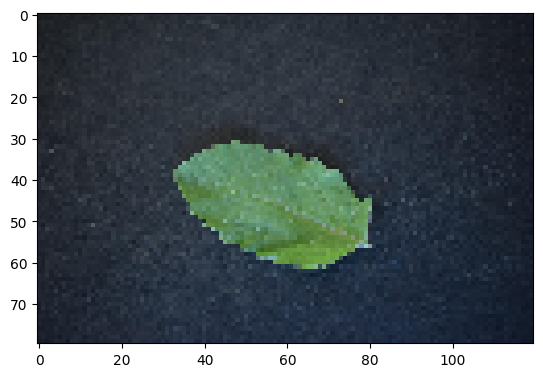

In [39]:
# 클래스 별 이미지 비율 조정을 위해 제거했던 바질 사진으로 테스트
img = image.load_img("basil.JPG", target_size=(80, 120))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis = 0)
img_array = img_array / 255.0

predict = model.predict(img_array)
plt.imshow(img)
print(target_list[np.argmax(predict)])


print("확률값")
for i in range(5):
  print(target_list[i], ':', "%0.7f" % predict[0][i])

1/1 [==============================] - 0s 18ms/step
Mango
확률값
Basil : 0.1531348
Chinar : 0.0000009
Jamun : 0.0000000
Lemon : 0.0001722
Mango : 0.8466920


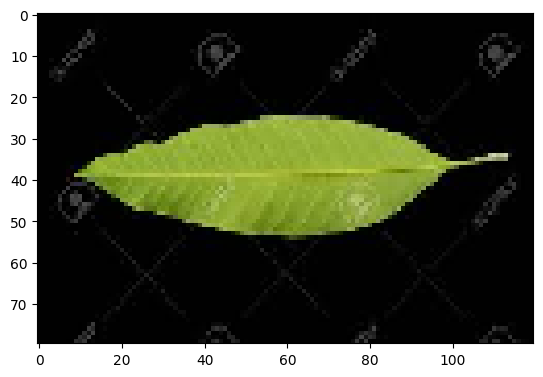

In [43]:
# 웹에서 찾은 망고 사진으로 테스트
img = image.load_img("mango.jpg", target_size=(80, 120))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis = 0)
img_array = img_array / 255.0

predict = model.predict(img_array)  # 결과 예측
plt.imshow(img)
print(target_list[np.argmax(predict)])

print("확률값")
for i in range(5):
  print(target_list[i], ':', "%0.7f" % predict[0][i])

1/1 [==============================] - 0s 17ms/step
Chinar
확률값
Basil : 0.2039490
Chinar : 0.7715524
Jamun : 0.0000000
Lemon : 0.0000146
Mango : 0.0244839


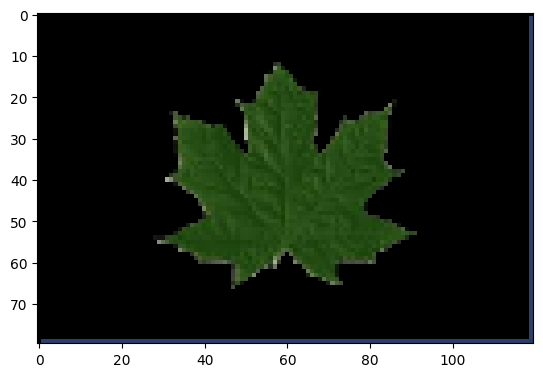

In [45]:
# 웹에서 찾은 버즘나무잎 사진으로 테스트
img = image.load_img("chinar.png", target_size=(80, 120))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis = 0)
img_array = img_array / 255.0

predict = model.predict(img_array)  # 결과 예측
plt.imshow(img)
print(target_list[np.argmax(predict)])

print("확률값")
for i in range(5):
  print(target_list[i], ':', "%0.7f" % predict[0][i])